#Week HW5 by Dmitriev Egor
[Link to watch online](https://colab.research.google.com/drive/1CH-lxA4REH9yG_pZpj-Kmxh-2BK8wlQZ)

# Task 1

## Given

$F_C(v^2) = -kv\vec v\\
m = 13.6g,\ 
L = 1500m,\ 
k = 1.3*10^{-5},\ 
v_0 = 870m/s$

## To find

$\alpha - ?\\
h_{max} - ?$

## Solution

* RO: 
  * Bullet (**point**)

* Conditions
$$
\begin{matrix}
\text{Initial} & \text{Apogee} & \text{Final}\\
t_0 = 0 & t_1 - ? & t_2 = t\\
r_x = 0 & r_x - ? & r_x = L\\
r_y = 0 & r_y = r_y^{max}& r_y = 0\\
v_x = v_0cos(\alpha) & v_x - ? & v_x-?\\
v_y = v_0sin(\alpha) & v_y = 0 & v_y-?
\end{matrix}
$$

### Subtask 1

### Force analysis:

Since we neclect air drag in this subtask:
$m\vec{a} = m\vec{g}$ 

  * $\begin{cases}
OX: a_x = 0
\\
OY: a_y = - g
\end{cases}$

  * $\begin{bmatrix}
\dot x\\ 
\ddot x\\ 
\dot y\\ 
\ddot y\\
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 1\\ 
0 & 0 & 0 & 0\\ 
\end{bmatrix}
\begin{bmatrix}
x\\ 
\dot x\\ 
y\\ 
\dot y\\
\end{bmatrix}
+
\begin{bmatrix}
0\\ 
0\\ 
0\\ 
-g\\
\end{bmatrix}
$

$ma_x = 0$

$mv_x = \int ma_x\ dt\\
mv_x = mC_1 = mv_0cos(\alpha)$

$mr_x = \int mv_x\ dt\\
mr_x = mv_0cos(\alpha)t+mC_2 = mv_0cos(\alpha)t$ 

$r_x = v_0cos(\alpha)t\$

$ma_y = -mg$

$mv_y = \int ma_y\ dt\\
mv_y = m(C_1-gt) = m(v_0sin(\alpha)-gt)$

$mr_y = \int mv_y\ dt\\
mr_y = m(v_0sin(\alpha) - \frac{gt^2}{2})$

$r_y = v_0sin(\alpha)t - \frac{gt^2}{2}$

Following final conditions $r_x = L,\ r_y = 0:$

$
\begin{cases}
r_x = v_0cos(\alpha)t\\
r_y =  v_0sin(\alpha)t - \frac{gt^2}{2}
\end{cases}
$

$
\begin{cases}
1500 = 870cos(\alpha)t\\
0 = t(2*870sin(\alpha) - gt)\text{ | $t=0$ is initial position}
\end{cases}
$

$
\begin{cases}
1500 = 870cos(\alpha)t\\
t = 2*870sin(\alpha)/g
\end{cases}
$

$1500 = 870^2(2cos(\alpha)sin(\alpha))/g\\
1500g = 870^2(sin(2\alpha))$

Assuming $g = 9.8 m/s^2$:

$sin(2\alpha) = 0.01942\dots\\
2\alpha = arcsin(0.01942\dots)\\
\text{or } 2\alpha = \pi - arcsin(0.01942\dots)\\
\alpha \in [ 0.0097106, 1.56108575] 
$


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


t:  1.7240998425954537
t:  177.54264936042543


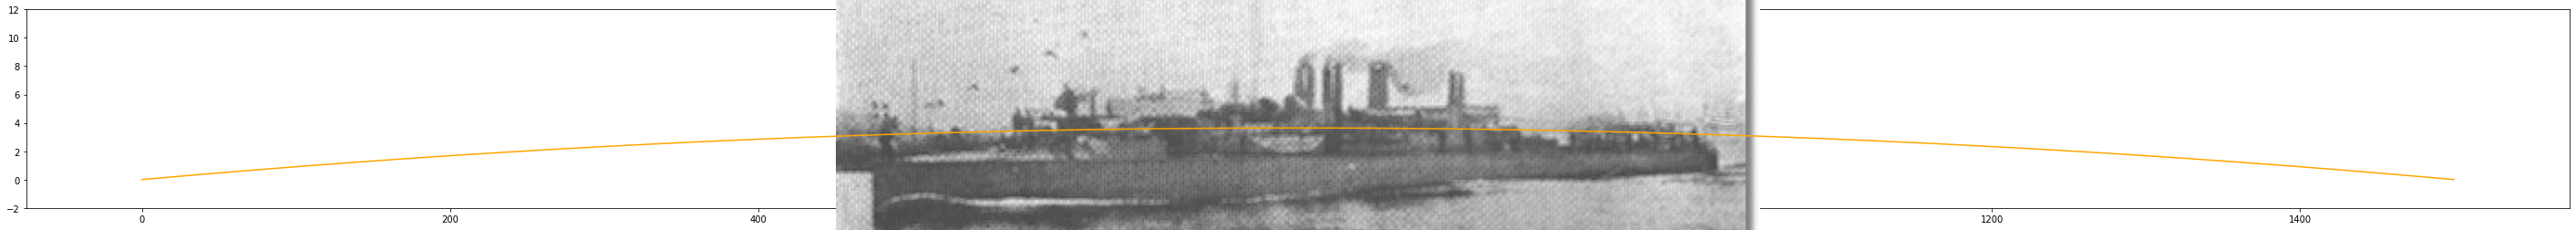

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig = plt.figure(figsize=(50,4))
grid = plt.GridSpec(1, 1, wspace=0.5, hspace=0.5)
ax2 = plt.subplot(grid[:, :])
ax2.set_ylim(-2, 12)


dt = 0.001
alphas = [0.0097106, 1.56108575]
g = 9.8
v0 = 870
X = []
Y = []
for alpha in alphas[:]:
  t = 2*870*np.sin(alpha)/g
  print("t: ", t)
  T = np.arange(0, t, dt)
  X.append(v0*np.cos(alpha)*T)
  Y.append(v0*np.sin(alpha)*T - g*np.power(T, 2)/2)
  # print(np.transpose([X, Y]))

Sfedoni = image.imread("./drive/MyDrive/Colab Notebooks/TM_HW/Sfendoni.png")
imagebox1 = OffsetImage(Sfedoni, zoom = 2)
ab1 = AnnotationBbox(imagebox1, (750, 7), frameon = False)
ax2.add_artist(ab1)
# ab1.set_zorder(-1000)

orng, = ax2.plot(X[0], Y[0], color='orange')
orng.set_zorder(1000)

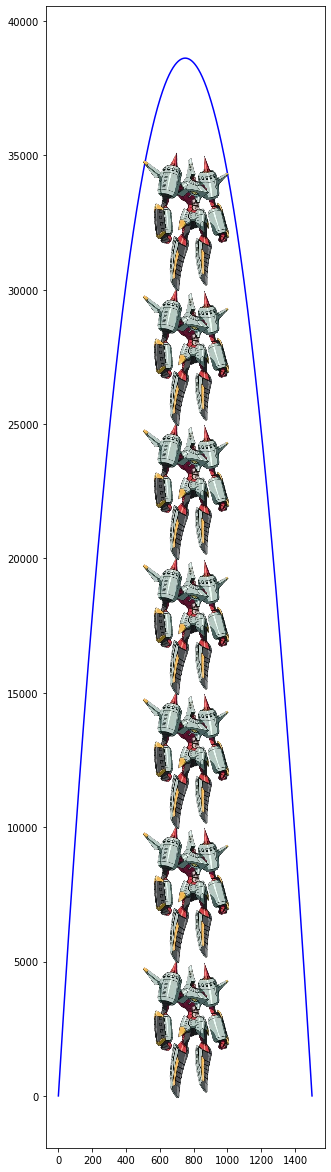

In [ ]:
fig = plt.figure(figsize=(5,21))
ax3 = plt.subplot(grid[:, :])

Fight_The_Power = image.imread("./drive/MyDrive/Colab Notebooks/TM_HW/Arc-Gurren.png")
imagebox2 = OffsetImage(Fight_The_Power, zoom = 0.28)
imagebox2.set_zorder(-1000)
ab2 = [AnnotationBbox(imagebox2, (750, 2500+5000*i), frameon = False) for i in range(7)]
for i in ab2:
  ax3.add_artist(i)

ax3.plot(X[1], Y[1], color='b')

As we can see our sniper can hit enemy officer only if he fired at $\underline{0.5564°}$ or at $\underline{89.4436°}$. So the bullet he fired traveled either $∼3.6$ meters up or $∼48.6$ kilometers up.

## Subtask 2

In [ ]:
print(max(Y[0]))
print(max(Y[1]))

3.641337315154677
38613.7056183342


### Answer

at $0.0097106 rad: \underline{3.64m}$

at $1.56108575 rad: \underline{38613.7m}$

Depending on the trajectory we can overshoot either an extremely small WW2 destroyer such as [Sfendoni](https://en.wikipedia.org/wiki/Greek_destroyer_Sfendoni_(1907)) or a stack of [7 Arc-Gurren Laganns](https://gurrenlagann.fandom.com/wiki/Arc-Gurren_Lagann).

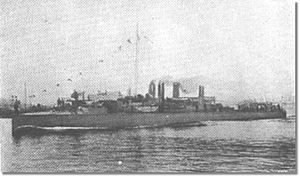

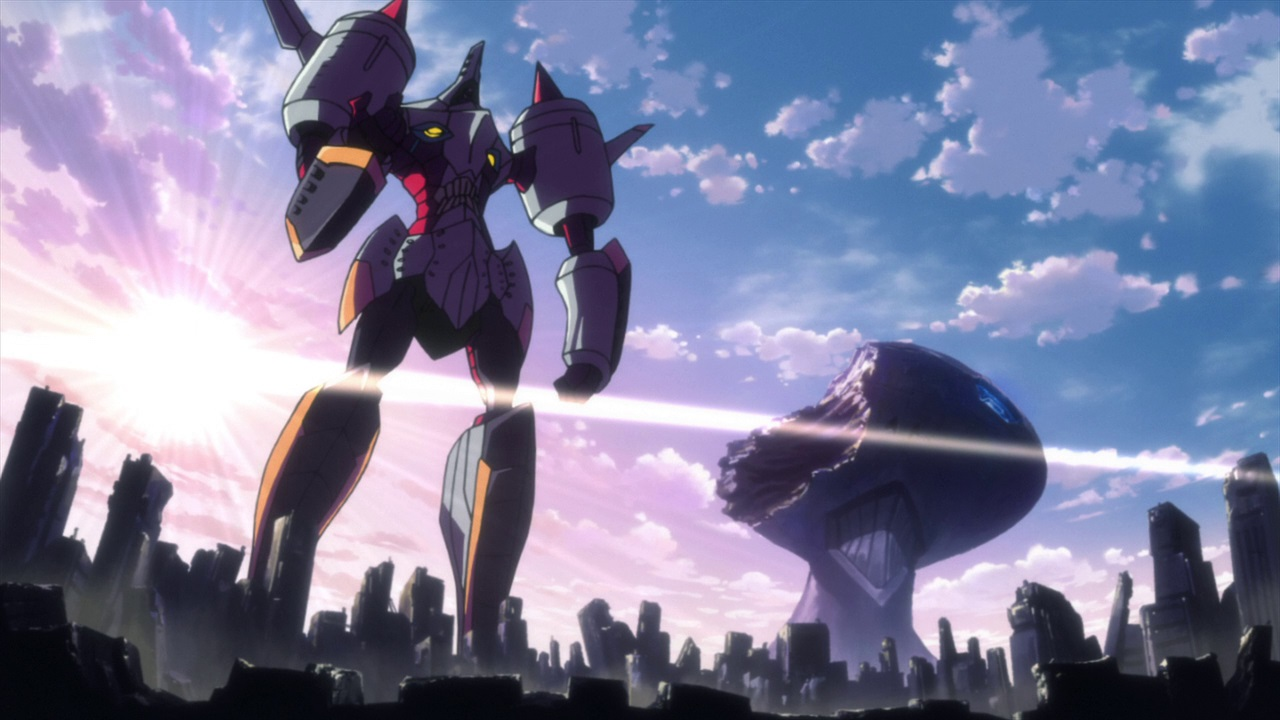

### Subtask 3

* RO: 
  * Bullet (assuming that it stabilizes itself along its trajectory and keeps air resistance coefficient $k$ constant we can assume the bullet as a **point**)

* Force analysis:
$m\vec{a} = -kv\vec{v} + m\vec{g}$

  * $\begin{cases}
OX: a_x = -k\sqrt{v_x^2+v_y^2}v_x/m
\\
OY: a_y = -k\sqrt{v_x^2+v_y^2}v_y/m - g
\end{cases}$


* $X = \begin{bmatrix}
x\\ 
\dot x\\ 
y\\ 
\dot y\\
\end{bmatrix}$

[0.03199999999999998, 1.197999999999999]


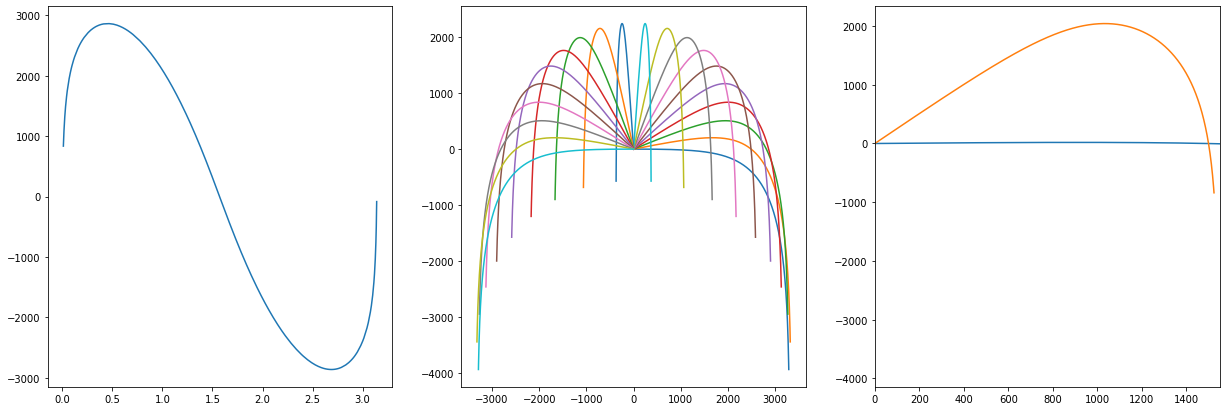

In [ ]:
from scipy.integrate import odeint 

k = 1.3e-5
g = 9.8
v0 = 870
alphas = np.arange(0.01, np.pi, 0.001)
alphas_s = np.linspace(0, np.pi, 20)
m = 0.0136
L = 1500

def nonliear_ode(X, t):

    x, vx, y, vy = X
    # Nonlinear dynamics
    dx = np.array([vx,
                   -k*np.sqrt(vx**2+vy**2)*vx/m,
                   vy,
                   -k*np.sqrt(vx**2+vy**2)*vy/m - g])

    return dx

t = np.arange(0, 50, 0.01)
distances = []
for alpha in alphas:
  X0 = np.array([0, v0*np.cos(alpha), 0, v0*np.sin(alpha)])
  x_nl = odeint(nonliear_ode, X0, t)
  t_cross = np.where(np.diff(np.sign(x_nl[:, 2])))[0]
  distances.append(x_nl[t_cross[1], 0])
  # print(t_cross, x_nl[t_cross, 0])
distances = np.array(distances)

fig = plt.figure(figsize=(21, 7))
grid = plt.GridSpec(1, 3, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1])
ax3 = plt.subplot(grid[0, 2])

for alpha in alphas_s:
  X0 = np.array([0, v0*np.cos(alpha), 0, v0*np.sin(alpha)])
  x_nl = odeint(nonliear_ode, X0, t)
  ax2.plot(x_nl[:, 0], x_nl[:, 2])

ax1.plot(alphas, distances)

alpha_target = [alphas[i] for i in np.where(np.diff(np.sign(distances - L)))[0]]
print(alpha_target)

for alpha in alpha_target:
  ax3.set_xlim(0, 1550)
  X0 = np.array([0, v0*np.cos(alpha), 0, v0*np.sin(alpha)])
  x_nl = odeint(nonliear_ode, X0, t)
  ax3.plot(x_nl[:, 0], x_nl[:, 2])

# Task 2